## Importing Libraries 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
%matplotlib inline

In [2]:
os.chdir(r"C:\Users\Priya Sharma\OneDrive\Desktop\Python Work\Models by me\Logistic Regression")
df=pd.read_csv("diabetes.csv")

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Inferences
* Every column has outlier except the Outcome column(which is our target variable as well)

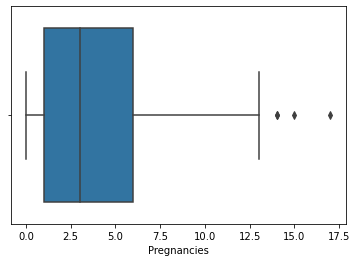

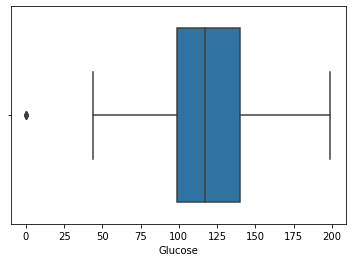

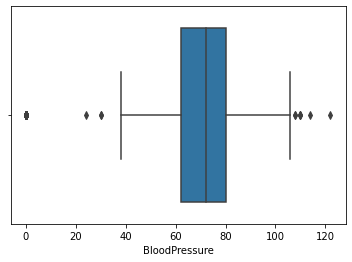

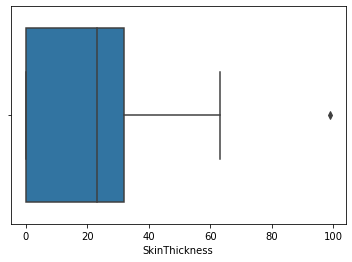

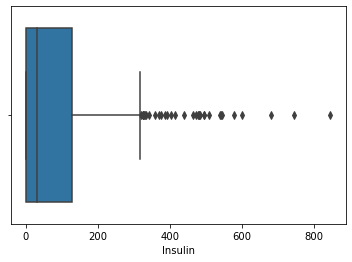

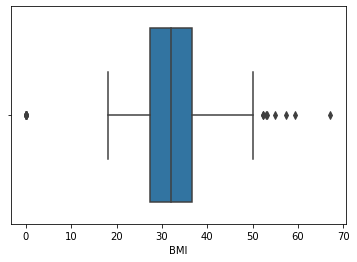

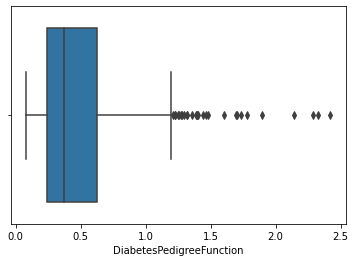

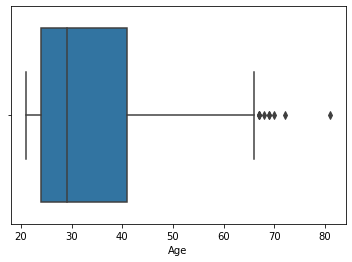

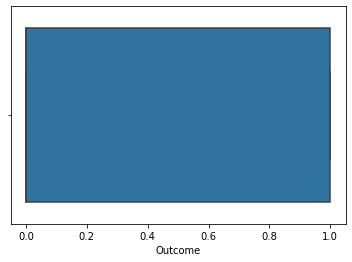

In [15]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
colsForOutliers=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [10]:
def outliers_treatment(x):
    x=x.clip(upper=x.quantile(0.95))
    x=x.clip(lower=x.quantile(0.04))
    return x

In [11]:
df[colsForOutliers]=df[colsForOutliers].apply(outliers_treatment)

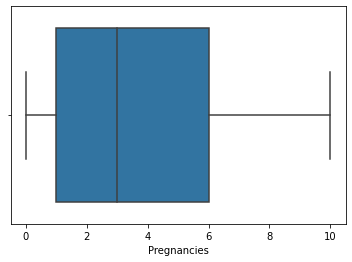

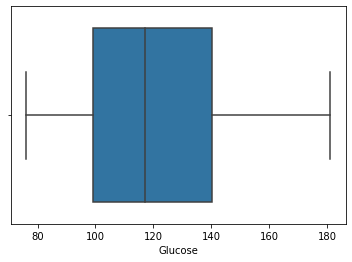

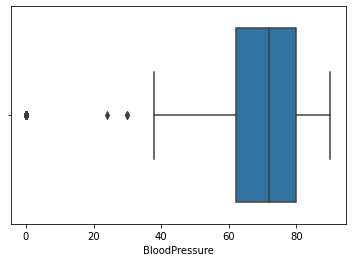

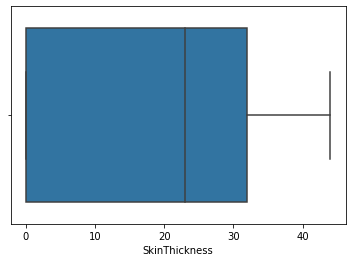

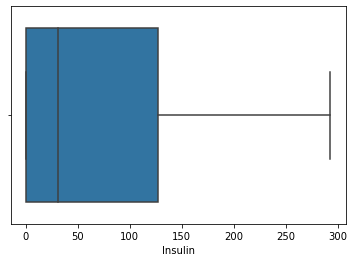

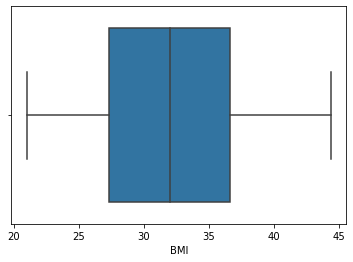

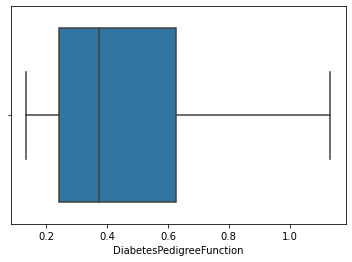

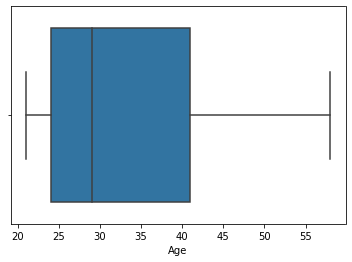

In [12]:
for i in colsForOutliers:
    sns.boxplot(x=df[i])
    plt.show()

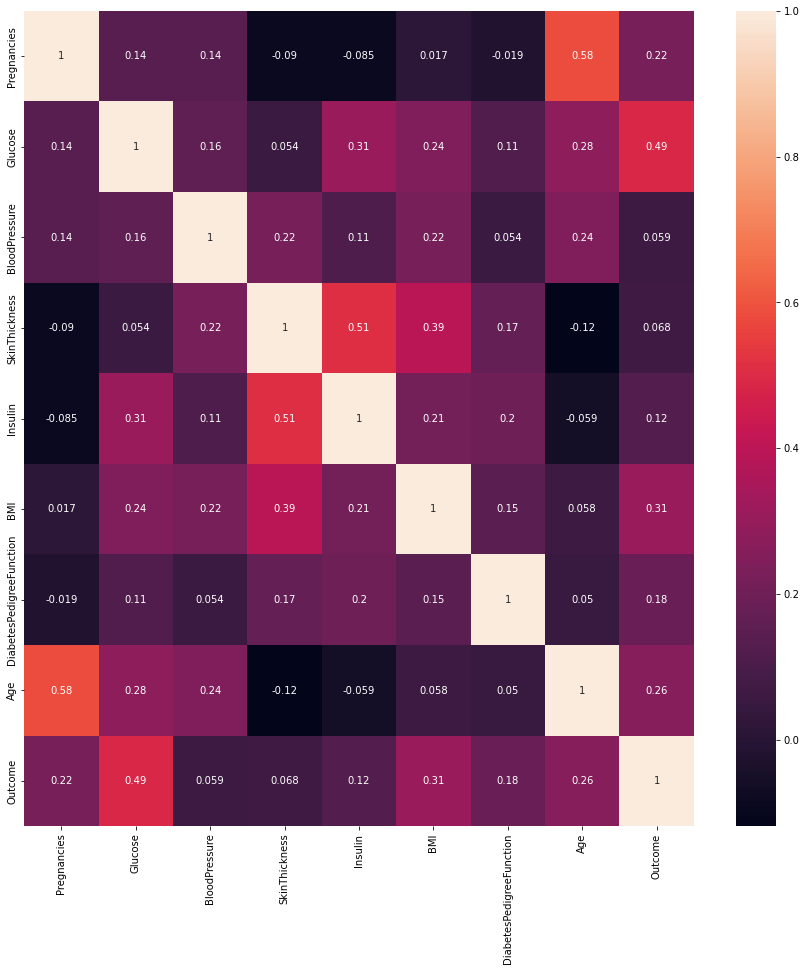

In [13]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

## Splitting the data 

In [12]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.62700,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.35100,31.0,0
2,8.0,181.0,64.0,0.0,0.0,23.3,0.67200,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.16700,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.13285,33.0,1


In [16]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Accuracy score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.7743055555555556
Testing Score 0.75


In [18]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0]


In [19]:
cm_m1  = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[99 24]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.65      0.65      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



## Decision Tree 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
params = {'criterion':['gini','entropy'],
         'min_samples_split':[10,15,20,25],
         'max_depth':[5,11,15,18]}

In [40]:
dt=DecisionTreeClassifier()
gs = GridSearchCV(dt,param_grid=params,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 11, 15, 18],
                         'min_samples_split': [10, 15, 20, 25]},
             scoring='accuracy')

In [41]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [42]:
predictions = gs.predict(x_test)

In [43]:
print("Training Score",gs.score(x_train,y_train))
print("Testing Score",gs.score(x_test,y_test))

Training Score 0.8194444444444444
Testing Score 0.75


In [44]:
cm_gs  = confusion_matrix(y_test,predictions)
print(cm_gs)
print(classification_report(y_test,predictions))

[[104  19]
 [ 29  40]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.68      0.58      0.63        69

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.75      0.75       192



## RandomForest

In [45]:
n_estimators = [64,100,128,200]
max_features = [2,3,4,5]
bootstrap = [True,False]
param_grid1 = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [46]:
rf = RandomForestClassifier()

In [47]:
grid = GridSearchCV(rf,param_grid1)

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200]})

In [49]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [51]:
predictions2 = grid.predict(x_test)

In [52]:
cm_gs2  = confusion_matrix(y_test,predictions2)
print(cm_gs2)
print(classification_report(y_test,predictions2))

[[99 24]
 [26 43]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       123
           1       0.64      0.62      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192

